In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import seaborn as sn

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/kaggle_dataset/Detecting Early Alzheimer/oasis_longitudinal.csv')
print('import done')

import done


In [ ]:
dataset.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
dataset.shape

(373, 15)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


## Drop unnecessary columns

In [ ]:
dataset = dataset.drop(['Hand'], axis=1)

## Replace variable to Detect variable

In [ ]:
dataset['Group'] = dataset['Group'].replace(['Converted'], ['Demented'])

## Splitting dataset by dependencies

In [ ]:
X = dataset.drop(['Group'],axis=1)
Y = dataset['Group']

## Finding missing value

In [ ]:
dataset_missing = X.isna()
dataset_missing.head()

,Subject ID,MRI ID,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
dataset_missing.dtypes

Subject ID    bool
MRI ID        bool
Visit         bool
MR Delay      bool
M/F           bool
Age           bool
EDUC          bool
SES           bool
MMSE          bool
CDR           bool
eTIV          bool
nWBV          bool
ASF           bool
dtype: object

In [ ]:
dataset_num_missing = dataset_missing.sum()
dataset_num_missing

Subject ID     0
MRI ID         0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
dataset_num_missing / len(dataset)

Subject ID    0.000000
MRI ID        0.000000
Visit         0.000000
MR Delay      0.000000
M/F           0.000000
Age           0.000000
EDUC          0.000000
SES           0.050938
MMSE          0.005362
CDR           0.000000
eTIV          0.000000
nWBV          0.000000
ASF           0.000000
dtype: float64

## Impute missing value By KNN

In [ ]:
from sklearn.impute import KNNImputer
knnimp = KNNImputer(n_neighbors = 5)

In [ ]:
num = [col for col in X.columns if dataset[col].dtypes != 'O']

In [ ]:
X[num].head()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,2,560,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,3,1895,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
knnimp.fit(X[num])

KNNImputer()

In [ ]:
X[num]  = knnimp.transform(X[num])

In [ ]:
X.isna().sum()

Subject ID    0
MRI ID        0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

## Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(Y)

LabelEncoder()

In [ ]:
le.classes_

array(['Demented', 'Nondemented'], dtype=object)

In [ ]:
Y = le.transform(Y)

In [ ]:
obj = [col for col in X.columns if dataset[col].dtypes == 'O']
X[obj]

,Subject ID,MRI ID,M/F
0,OAS2_0001,OAS2_0001_MR1,M
1,OAS2_0001,OAS2_0001_MR2,M
2,OAS2_0002,OAS2_0002_MR1,M
3,OAS2_0002,OAS2_0002_MR2,M
4,OAS2_0002,OAS2_0002_MR3,M
...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,M
369,OAS2_0185,OAS2_0185_MR3,M
370,OAS2_0186,OAS2_0186_MR1,F
371,OAS2_0186,OAS2_0186_MR2,F


In [ ]:
le1 = LabelEncoder()
le1.fit(X['Subject ID'])
X['Subject ID'] = le1.transform(X['Subject ID'])

In [ ]:
le2 = LabelEncoder()
le2.fit(X['MRI ID'])
X['MRI ID'] = le2.transform(X['MRI ID'])

In [ ]:
le3 = LabelEncoder()
le3.fit(X['M/F'])
X['M/F'] = le3.transform(X['M/F'])

In [ ]:
Y

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,

## Feature transformation or Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X

array([[-1.68347236, -1.72741345, -0.95706686, ...,  2.83605891,
        -0.90516867, -2.2657425 ],
       [-1.68347236, -1.71812628,  0.12799678, ...,  2.93270307,
        -1.30964265, -2.31650145],
       [-1.660519  , -1.70883911, -0.95706686, ...,  1.07940909,
         0.17342861, -1.08378418],
       ...,
       [ 1.73657894,  1.70883911, -0.95706686, ..., -0.96148827,
         1.92614919,  0.98283006],
       [ 1.73657894,  1.71812628,  0.12799678, ..., -0.91600866,
         1.79132453,  0.92481984],
       [ 1.73657894,  1.72741345,  1.21306043, ..., -0.88189896,
         1.92614919,  0.88131217]])

## Handling Imbalanced Dataset

Text(0, 0.5, 'No of patients')

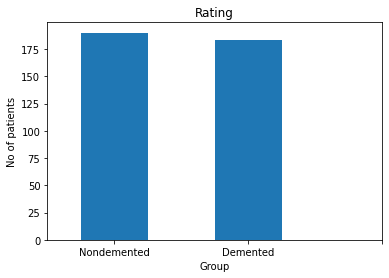

In [ ]:
count_classes = pd.value_counts(dataset['Group'])
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Rating")
plt.xticks(range(3))
plt.xlabel("Group")
plt.ylabel("No of patients")

In [ ]:
nondemented = Y[Y== 1]
demented = Y[Y== 0]

In [ ]:
print(nondemented.shape, demented.shape)

(190,) (183,)


## SMOTE Sampling

In [ ]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 10)

In [ ]:
X,Y = smk.fit_resample(X,Y)

In [ ]:
X.shape,Y.shape

((364, 13), (364,))

## Over Sampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(ratio = 1)

In [ ]:
XS,Ys = os.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
XS.shape, Ys.shape

((364, 13), (364,))

## Feature Correlation and Dimension Reduction(LDA)

In [ ]:
from sklearn.preprocessing import Normalizer
X = Normalizer().fit_transform(X)
X = pd.DataFrame(X)

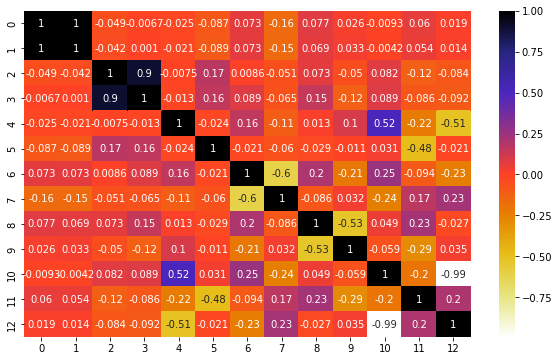

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components =-1 )
X = lda.fit_transform(X,Y)

## Splitting dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## Import libraries and Function

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
import seaborn as sns

In [ ]:
def cvresult(y,pred):
  print('Cross Val f1 score : ',f1_score(y,pred))
  print('Cross Val Precision : ',precision_score(y,pred))
  print('Cross Val recall : ',recall_score(y,pred))
  print('Cross Val Classification Report : \n',classification_report(y,pred))

In [ ]:
def result(y,p):
  print('Accuracy : ',accuracy_score(y,p))
  print('f1 score : ',f1_score(y,p))
  print('Precision : ',precision_score(y,p))
  print('recall : ',recall_score(y,p))
  print('Classification Report : \n',classification_report(y,p))

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

## K-Fold Validation Import

In [ ]:
from sklearn.model_selection import cross_val_score

## Import Classifier Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier

# Hyper Parameter Tuning

###  Random search Grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

### Linear Regression Random Search

In [ ]:
rs = RandomizedSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'),{ 'C' : [1,5,10]}, cv = 10,return_train_score=False, n_iter=2)
rs.fit(X,Y)
best_paramlr = rs.best_params_
pd.DataFrame(rs.cv_results_)[['param_C','mean_test_score']]
print(best_paramlr)

{'C': 1}


###KNN Random Search

In [ ]:
rs = RandomizedSearchCV(KNeighborsClassifier(), {
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
        })
rs.fit(X,Y)
best_paramknn = rs.best_params_
pd.DataFrame(rs.cv_results_)[['param_leaf_size','param_n_neighbors','param_p','mean_test_score']]
print(best_paramknn)

{'p': 1, 'n_neighbors': 15, 'leaf_size': 15}


### SVM Random Search

In [ ]:
srs = RandomizedSearchCV(SVC(gamma='auto'),
            {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        })
srs.fit(X,Y)
best_params = srs.best_params_
pd.DataFrame(srs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.967047
1,1,linear,0.967047
2,5,rbf,0.920129
3,5,linear,0.967047
4,10,rbf,0.911834
5,10,linear,0.967047
6,20,rbf,0.884399
7,20,linear,0.967047
8,50,rbf,0.878881
9,50,linear,0.967047


### Naive Bayes Random Search

In [ ]:
nbrs = RandomizedSearchCV(GaussianNB(),
            {
            'var_smoothing' : [0.3,0.4,0.5,0.6,0.7,0.8]
        })
nbrs.fit(X,Y)
best_paramnb = nbrs.best_params_
pd.DataFrame(nbrs.cv_results_)[['param_var_smoothing','mean_test_score']]
print(best_paramnb)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'var_smoothing': 0.3}


### Decision tree Random Search

In [ ]:
dtrs = RandomizedSearchCV(DecisionTreeClassifier(),{
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50]
        })
dtrs.fit(X,Y)
best_paramdt = dtrs.best_params_
pd.DataFrame(dtrs.cv_results_)[['param_splitter','param_max_depth','param_min_samples_leaf','param_max_features','param_max_leaf_nodes','mean_test_score']]

,param_splitter,param_max_depth,param_min_samples_leaf,param_max_features,param_max_leaf_nodes,mean_test_score
0,best,3,1,auto,10,0.808143
1,random,3,1,sqrt,20,0.717694
2,random,3,2,log2,None,0.700304
3,random,5,3,sqrt,50,0.742390
4,random,1,4,log2,30,0.643760
5,best,1,3,None,10,0.967047
6,best,1,1,auto,None,0.628729
7,best,1,2,sqrt,50,0.700837
8,random,1,2,None,50,0.843760
9,random,5,1,log2,50,0.692123


### Random Forest Random Search

In [ ]:
rfrs = RandomizedSearchCV(RandomForestClassifier(),{
            'bootstrap': [True],
            'max_depth': [i for i in range(1,20,1)],
            'max_features': ['auto', 'log2','sqrt'],
            'min_samples_split':[i for i in range(1,50,1)],
            'n_estimators': [i for i in range(1,50,1)]
        })
rfrs.fit(X,Y)
best_paramrf = rfrs.best_params_
pd.DataFrame(rfrs.cv_results_)[['param_bootstrap','param_max_depth','param_max_features','param_n_estimators','mean_test_score']]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/parall

,param_bootstrap,param_max_depth,param_max_features,param_n_estimators,mean_test_score
0,True,3,log2,18,0.947869
1,True,4,auto,14,0.947869
2,True,19,sqrt,39,0.967047
3,True,4,log2,8,0.964307
4,True,10,auto,9,0.950609
5,True,5,sqrt,7,NaN
6,True,14,sqrt,13,0.961568
7,True,13,log2,30,0.967047
8,True,18,log2,34,0.958828
9,True,12,log2,46,0.967047


### Extra Tree Random Search

In [ ]:
etrs = RandomizedSearchCV(ExtraTreeClassifier(),{
            'criterion': ['gini','entropy'],
            'max_depth': [i for i in range(1,50,1)],
            'max_features': ['auto', 'log2','sqrt']
        })
etrs.fit(X,Y)
best_paramet = etrs.best_params_
pd.DataFrame(etrs.cv_results_)[['param_criterion','param_max_depth','param_max_features',
                              'mean_test_score']]

,param_criterion,param_max_depth,param_max_features,mean_test_score
0,entropy,25,sqrt,0.835122
1,gini,20,log2,0.854718
2,gini,9,log2,0.777245
3,entropy,38,auto,0.903767
4,entropy,1,log2,0.598896
5,entropy,41,auto,0.854186
6,gini,46,log2,0.884589
7,entropy,42,auto,0.887405
8,gini,39,log2,0.807725
9,entropy,24,sqrt,0.805365


# Find best parameters

In [ ]:
model_params = {
    'logistic_regression' :{
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C' : [1,5,10,20,50]
        }
    },
    'KNN' :{
        'model': KNeighborsClassifier(),
        'params': {
            'leaf_size' : [1,5,10,15,20,50],
            'n_neighbors' : [1,5,10,15],
            'p' : [1,2,3]
        }
    },
    'SVM' :{
        'model': SVC(gamma='auto'),
        'params': {
            'C' : [1,5,10,20,50],
            'kernel': ['rbf','linear']
        }
    },
    'Naive Bayes' :{
        'model': GaussianNB(),
        'params': {
            'var_smoothing' : [0.01,0.02,0.026,0.0265,0.0258,0.03]
        }
    },
    'Decision Tree' :{
        'model': DecisionTreeClassifier(),
        'params': {
            'splitter':['best','random'],
            'max_depth' : [1,3,5],
            'min_samples_leaf':[1,2,3,4,5],
            'max_features':['auto','log2','sqrt',None],
            'max_leaf_nodes':[None,10,20,30,40,50,60,70,80,90]
        }
    },
    'Random Forest' :{
        'model': RandomForestClassifier(),
        'params': {
            'bootstrap': [True],
            'max_depth': [5, 10, None],
            'max_features': ['auto', 'log2'],
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
        }
    }
}

In [ ]:
scores = []
for model_name,mp in model_params.items():
  clf= GridSearchCV(mp['model'],mp['params'],cv=10, return_train_score=False)
  clf.fit(X_train,Y_train)
  scores.append({
      'model' : model_name,
      'best_score' : clf.best_score_,
      'best_params' : clf.best_params_

  })

In [ ]:
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.963360,{'C': 1}
1,KNN,0.930556,"{'leaf_size': 1, 'n_neighbors': 5, 'p': 1}"
2,SVM,0.963360,"{'C': 1, 'kernel': 'linear'}"
3,Naive Bayes,0.963360,{'var_smoothing': 0.026}
4,Decision Tree,0.967063,"{'max_depth': 5, 'max_features': None, 'max_le..."
5,Random Forest,0.967063,"{'bootstrap': True, 'max_depth': 5, 'max_featu..."


# Traditional Algorithm

##Logistic Regression

In [ ]:
classifier = LogisticRegression(random_state=42,C=best_paramlr['C'])
classifier.fit(X, Y)

LogisticRegression(C=1, random_state=42)

In [ ]:
r_prob = [0 for _ in range(len(Y_test))]

In [ ]:
Y_predlr = classifier.predict(X_test)

In [ ]:
ytest_pred = classifier.predict_proba(X_test)
lr_prob = classifier.predict_proba(X_test)

In [ ]:
Y_cvpredlr = cross_val_predict(classifier, X, Y, cv=10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predlr)
print(cm)

[[38  2]
 [ 0 51]]


In [ ]:
cm = confusion_matrix(Y,Y_cvpredlr)
print(cm)

[[172  10]
 [  2 180]]


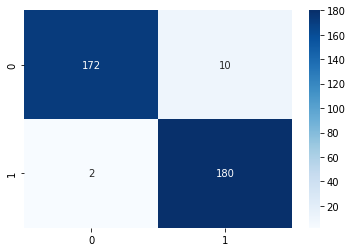

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(classifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 0.97297297 1.         0.97297297 1.         1.
 0.91666667 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9671921921921921


In [ ]:
cvresult(Y,Y_cvpredlr)

Cross Val f1 score :  0.967741935483871
Cross Val Precision :  0.9473684210526315
Cross Val recall :  0.989010989010989
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       182
           1       0.95      0.99      0.97       182

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



In [ ]:
result(Y_test,Y_predlr)

Accuracy :  0.978021978021978
f1 score :  0.9807692307692307
Precision :  0.9622641509433962
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.96      1.00      0.98        51

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
lr_auc = roc_auc_score(Y_test,lr_prob[:,1])
print('roc-auc score :{}'.format(lr_auc))

roc-auc score :0.9990196078431373


##K-NN

In [ ]:
import math
math.sqrt(len(Y_test))

9.539392014169456

In [ ]:
kclassifier = KNeighborsClassifier(n_neighbors = best_paramknn['n_neighbors'],
                                   p=best_paramknn['p'],leaf_size=best_paramknn['leaf_size'])
kclassifier.fit(X,Y)

KNeighborsClassifier(leaf_size=50, p=1)

In [ ]:
Y_predk = kclassifier.predict(X_test)

In [ ]:
Y_cvpredk = cross_val_predict(kclassifier, X, Y, cv=10)

In [ ]:
ytest_pred = kclassifier.predict_proba(X_test)
knn_prob = kclassifier.predict_proba(X_test)

In [ ]:
cmk = confusion_matrix(Y_test,Y_predk)
print(cmk)

[[37  0]
 [ 0 54]]


In [ ]:
cmk = confusion_matrix(Y,Y_cvpredk)
print(cmk)

[[154  27]
 [  6 175]]


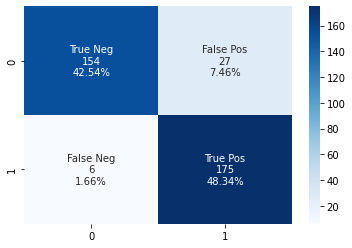

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmk.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmk.flatten()/np.sum(cmk)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmk, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 0.89189189 0.94444444 0.91666667 0.94444444 0.94444444
 0.86111111 0.88888889 0.86111111 0.97222222]

Cross Val Accuracy : 0.9090090090090088


In [ ]:
cvresult(Y,Y_cvpredk)

Cross Val f1 score :  0.9138381201044385
Cross Val Precision :  0.8663366336633663
Cross Val recall :  0.9668508287292817
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.85      0.90       181
           1       0.87      0.97      0.91       181

    accuracy                           0.91       362
   macro avg       0.91      0.91      0.91       362
weighted avg       0.91      0.91      0.91       362



In [ ]:
result(Y_test,Y_predk)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
knn_auc = roc_auc_score(Y_test,knn_prob[:,1])
print('roc-auc score :{}'.format(knn_auc))

roc-auc score :1.0


##SVM

In [ ]:
sclassifier = SVC(kernel = best_params['kernel'],random_state = 42,C=best_params['C'], probability=True)
sclassifier.fit(X,Y)

SVC(C=1, probability=True, random_state=42)

In [ ]:
Y_preds = sclassifier.predict(X_test)

In [ ]:
ytest_pred = sclassifier.predict_proba(X_test)
svm_prob = sclassifier.predict_proba(X_test)

In [ ]:
Y_cvpreds = cross_val_predict(sclassifier, X, Y, cv=10)

In [ ]:
cms = confusion_matrix(Y_test,Y_preds)
print(cms)

[[38  2]
 [ 0 51]]


In [ ]:
cms = confusion_matrix(Y,Y_cvpreds)
print(cms)

[[172  10]
 [  2 180]]


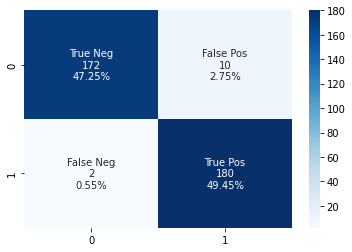

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cms.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cms.flatten()/np.sum(cms)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 0.97297297 1.         0.97297297 1.         1.
 0.91666667 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9671921921921921


In [ ]:
cvresult(Y,Y_cvpreds)

Cross Val f1 score :  0.967741935483871
Cross Val Precision :  0.9473684210526315
Cross Val recall :  0.989010989010989
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       182
           1       0.95      0.99      0.97       182

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



In [ ]:
result(Y_test,Y_preds)

Accuracy :  0.978021978021978
f1 score :  0.9807692307692307
Precision :  0.9622641509433962
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.96      1.00      0.98        51

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
svm_auc = roc_auc_score(Y_test,svm_prob[:,1])
print('roc-auc score :{}'.format(svm_auc))

roc-auc score :1.0


##kernel SVM

In [ ]:
ksclassifier = SVC(kernel = 'linear',C=1,random_state = 0, probability=True)
ksclassifier.fit(X,Y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
Y_predks = ksclassifier.predict(X_test)

In [ ]:
 ytest_pred = ksclassifier.predict_proba(X_test)
 ksvm_prob = ksclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredks = cross_val_predict(ksclassifier, X, Y, cv=10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predks)
print(cm)

[[38  2]
 [ 0 51]]


In [ ]:
cmks = confusion_matrix(Y,Y_cvpredks)
print(cmks)

[[172  10]
 [  2 180]]


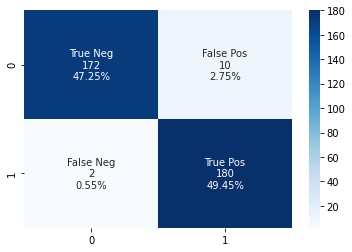

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmks.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmks.flatten()/np.sum(cmks)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmks, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 0.97297297 1.         0.97297297 1.         1.
 0.91666667 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9671921921921921


In [ ]:
cvresult(Y,Y_cvpredks)

Cross Val f1 score :  0.967741935483871
Cross Val Precision :  0.9473684210526315
Cross Val recall :  0.989010989010989
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       182
           1       0.95      0.99      0.97       182

    accuracy                           0.97       364
   macro avg       0.97      0.97      0.97       364
weighted avg       0.97      0.97      0.97       364



In [ ]:
result(Y_test,Y_predks)

Accuracy :  0.978021978021978
f1 score :  0.9807692307692307
Precision :  0.9622641509433962
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.96      1.00      0.98        51

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
ksvm_auc = roc_auc_score(Y_test,ksvm_prob[:,1])
print('roc-auc score :{}'.format(ksvm_auc))

roc-auc score :0.9833333333333333


## Naive Bays

In [ ]:
nbclassifier = GaussianNB(var_smoothing=best_paramnb['var_smoothing'])
nbclassifier.fit(X,Y)

GaussianNB(var_smoothing=0.3)

In [ ]:
Y_prednb = nbclassifier.predict(X_test)

In [ ]:
ytest_pred = nbclassifier.predict_proba(X_test)
nb_prob = nbclassifier.predict_proba(X_test)

In [ ]:
Y_cvprednb = cross_val_predict(nbclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_prednb)
print(cms)

[[37  3]
 [ 0 51]]


In [ ]:
cvcms = confusion_matrix(Y, Y_cvprednb)
print(cvcms)

[[166  16]
 [  2 180]]


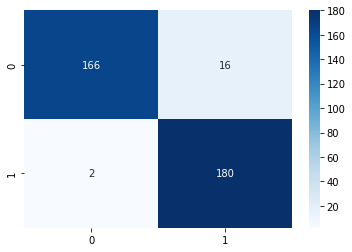

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cvcms.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcms, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 0.97297297 0.97297297 0.97297297 1.         0.94444444
 0.86111111 0.97222222 0.94444444 1.        ]

Cross Val Accuracy : 0.9506006006006006


In [ ]:
cvresult(Y,Y_cvprednb)

Cross Val f1 score :  0.9523809523809524
Cross Val Precision :  0.9183673469387755
Cross Val recall :  0.989010989010989
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.91      0.95       182
           1       0.92      0.99      0.95       182

    accuracy                           0.95       364
   macro avg       0.95      0.95      0.95       364
weighted avg       0.95      0.95      0.95       364



In [ ]:
result(Y_test,Y_prednb)

Accuracy :  0.967032967032967
f1 score :  0.9714285714285714
Precision :  0.9444444444444444
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        40
           1       0.94      1.00      0.97        51

    accuracy                           0.97        91
   macro avg       0.97      0.96      0.97        91
weighted avg       0.97      0.97      0.97        91



In [ ]:
nb_auc = roc_auc_score(Y_test,nb_prob[:,1])
print('roc-auc score :{}'.format(nb_auc))

roc-auc score :0.9955882352941177


## Decision Tree

In [ ]:
dtclassifier = DecisionTreeClassifier(splitter=best_paramdt['splitter'],max_depth=best_paramdt['max_depth'],
                                      min_samples_leaf=best_paramdt['min_samples_leaf'],max_features=best_paramdt['max_features'],
                                      max_leaf_nodes=best_paramdt['max_leaf_nodes'])
dtclassifier.fit(X,Y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=30, min_samples_leaf=3,
                       splitter='random')

In [ ]:
Y_preddt = dtclassifier.predict(X_test)

In [ ]:
ytest_pred = dtclassifier.predict_proba(X_test)
dt_prob = dtclassifier.predict_proba(X_test)

In [ ]:
Y_cvpreddt = cross_val_predict(dtclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_preddt)
print(cms)

[[36  4]
 [ 2 49]]


In [ ]:
cvcmsdt = confusion_matrix(Y, Y_cvpreddt)
print(cvcmsdt)

[[172  10]
 [ 15 167]]


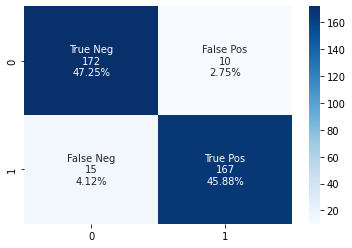

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsdt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsdt.flatten()/np.sum(cvcmsdt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsdt, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 0.91891892 1.         0.94594595 1.         1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9563063063063064


In [ ]:
cvresult(Y,Y_cvpreddt)

Cross Val f1 score :  0.9303621169916434
Cross Val Precision :  0.943502824858757
Cross Val recall :  0.9175824175824175
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       182
           1       0.94      0.92      0.93       182

    accuracy                           0.93       364
   macro avg       0.93      0.93      0.93       364
weighted avg       0.93      0.93      0.93       364



In [ ]:
result(Y_test,Y_preddt)

Accuracy :  0.9340659340659341
f1 score :  0.9423076923076923
Precision :  0.9245283018867925
recall :  0.9607843137254902
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      0.90      0.92        40
           1       0.92      0.96      0.94        51

    accuracy                           0.93        91
   macro avg       0.94      0.93      0.93        91
weighted avg       0.93      0.93      0.93        91



In [ ]:
dt_auc = roc_auc_score(Y_test,dt_prob[:,1])
print('roc-auc score :{}'.format(dt_auc))

roc-auc score :0.9933823529411765


## Random forest

In [ ]:
rfclassifier = RandomForestClassifier(n_estimators = best_paramrf['n_estimators'],bootstrap=best_paramrf['bootstrap'],
                                      max_depth=best_paramrf['max_depth'], min_samples_split=best_paramrf['min_samples_split'],
                                      max_features=best_paramrf['max_features'], random_state = 42)
rfclassifier.fit(X,Y)

RandomForestClassifier(max_depth=19, max_features='sqrt', min_samples_split=18,
                       n_estimators=39, random_state=42)

In [ ]:
Y_predrf = rfclassifier.predict(X_test)

In [ ]:
ytest_pred = rfclassifier.predict_proba(X_test)
rf_prob = rfclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredrf = cross_val_predict(rfclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predrf)
print(cms)

[[38  2]
 [ 0 51]]


In [ ]:
cvcmsrf = confusion_matrix(Y, Y_cvpredrf)
print(cvcmsrf)

[[172  10]
 [  6 176]]


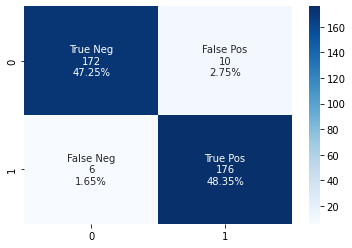

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmsrf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmsrf.flatten()/np.sum(cvcmsrf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmsrf, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 0.97297297 1.         0.97297297 1.         1.
 0.91666667 1.         0.94444444 0.88888889]

Cross Val Accuracy : 0.956081081081081


In [ ]:
cvresult(Y,Y_cvpredrf)

Cross Val f1 score :  0.9565217391304348
Cross Val Precision :  0.946236559139785
Cross Val recall :  0.967032967032967
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       182
           1       0.95      0.97      0.96       182

    accuracy                           0.96       364
   macro avg       0.96      0.96      0.96       364
weighted avg       0.96      0.96      0.96       364



In [ ]:
result(Y_test,Y_predrf)

Accuracy :  0.978021978021978
f1 score :  0.9807692307692307
Precision :  0.9622641509433962
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.96      1.00      0.98        51

    accuracy                           0.98        91
   macro avg       0.98      0.97      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
rf_auc = roc_auc_score(Y_test,rf_prob[:,1])
print('roc-auc score :{}'.format(rf_auc))

roc-auc score :1.0


## Extra Tree

In [ ]:
etclassifier = ExtraTreeClassifier(criterion=best_paramet['criterion'],max_depth=best_paramet['max_depth'],
                                   max_features=best_paramet['max_features'],random_state=42)
etclassifier.fit(X,Y)

ExtraTreeClassifier(criterion='entropy', max_depth=48, max_features='log2',
                    random_state=42)

In [ ]:
Y_predet = etclassifier.predict(X_test)

In [ ]:
ytest_pred = etclassifier.predict_proba(X_test)
et_prob = etclassifier.predict_proba(X_test)

In [ ]:
Y_cvpredet = cross_val_predict(etclassifier,X,Y,cv = 10)

In [ ]:
cms = confusion_matrix(Y_test,Y_predet)
print(cms)

[[40  0]
 [ 0 51]]


In [ ]:
cvcmset = confusion_matrix(Y, Y_cvpredet)
print(cvcmset)

[[162  20]
 [ 20 162]]


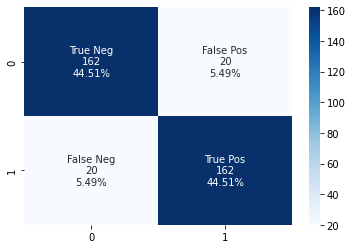

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cvcmset.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cvcmset.flatten()/np.sum(cvcmset)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cvcmset, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etclassifier,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.75675676 0.75675676 0.94594595 0.94594595 0.91666667 0.97222222
 0.88888889 0.94444444 0.94444444 0.83333333]

Cross Val Accuracy : 0.8905405405405405


In [ ]:
cvresult(Y,Y_cvpredet)

Cross Val f1 score :  0.8901098901098901
Cross Val Precision :  0.8901098901098901
Cross Val recall :  0.8901098901098901
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.89      0.89       182
           1       0.89      0.89      0.89       182

    accuracy                           0.89       364
   macro avg       0.89      0.89      0.89       364
weighted avg       0.89      0.89      0.89       364



In [ ]:
result(Y_test,Y_predet)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        51

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
et_auc = roc_auc_score(Y_test,et_prob[:,1])
print('roc-auc score :{}'.format(et_auc))

roc-auc score :1.0


## ROC-AUC Curve

In [ ]:
pred = []
for model in [classifier, kclassifier, sclassifier, ksclassifier, nbclassifier, dtclassifier,rfclassifier] :
  pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction = pd.concat(pred,axis=1).mean(axis=1)
print('Final roc-auc score :{}'.format(roc_auc_score(Y_test,final_prediction)))

Final roc-auc score :0.9975490196078431


In [ ]:
pd.concat(pred,axis=1)

,0,1,2,3,4,5,6
0,0.000002,0.0,0.025713,0.000015,9.786476e-23,0.000000,0.000000
1,0.960424,1.0,0.950225,0.946791,9.839752e-01,1.000000,0.997674
2,0.000558,0.0,0.015714,0.001723,1.189474e-10,0.000000,0.000000
3,0.000063,0.0,0.028539,0.000263,5.778923e-15,0.000000,0.000000
4,0.003388,0.0,0.007232,0.008231,1.463403e-07,0.000000,0.000000
...,...,...,...,...,...,...,...
86,0.918120,1.0,0.941463,0.901257,9.672220e-01,1.000000,0.997674
87,0.956866,1.0,0.949876,0.942743,9.827402e-01,1.000000,0.997674
88,0.000119,0.0,0.026000,0.000452,1.182818e-13,0.000000,0.000000
89,0.965582,0.8,0.950510,0.952760,9.857115e-01,0.884615,0.588151


In [ ]:
final_prediction

0     0.003676
1     0.977013
2     0.002571
3     0.004124
4     0.002693
        ...   
86    0.960819
87    0.975700
88    0.003796
89    0.875333
90    0.945319
Length: 91, dtype: float64

In [ ]:
fpr, tpr, thresholds = roc_curve(Y_test, final_prediction)
thresholds

array([1.98586043, 0.98586043, 0.90262263, 0.8753328 , 0.80249098,
       0.00222799])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_ls=[]
for thres in thresholds:
  y_pred = np.where(final_prediction>thres,1,0)
  accuracy_ls.append(accuracy_score(Y_test,y_pred, normalize=True))
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['Thresholds','Accuracy']
accuracy_ls.sort_values(by='Accuracy', ascending = False, inplace=True)
accuracy_ls.head()

,Thresholds,Accuracy
4,0.802491,0.978022
3,0.875333,0.945055
2,0.902623,0.934066
5,0.002228,0.571429
0,1.985860,0.439560


In [ ]:
def plot_roc_curve(fpr, tpr):
  plt.plot(fpr, tpr, color = 'red', label='ROC')
  plt.plot([0,1], [0,1], color= 'blue', linestyle='--' )
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC CURVE')
  plt.legend()
  plt.show()

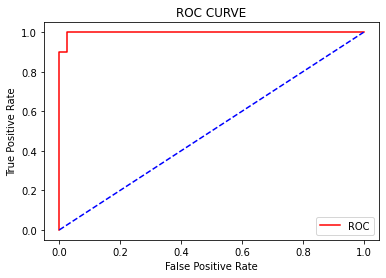

In [ ]:
plot_roc_curve(fpr, tpr)

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])

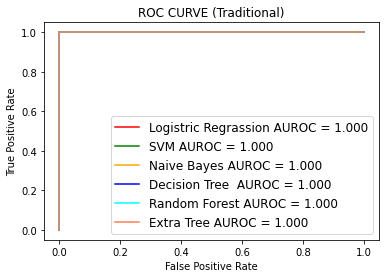

In [ ]:
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (Traditional)')
plt.legend(loc=4, prop={'size': 12})
plt.show()

# K fold function

In [ ]:
def Kfold_result(X,Y,model,foldnum):
   print("\ncross validation")
   from sklearn.model_selection import cross_val_score, cross_validate,cross_val_predict
   from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
   scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

   results = cross_validate(estimator=model,
                                          X=X,
                                          y=Y,
                                          cv=10,
                                          scoring=scoring)
   print('cross accuracy:',np.mean(results['test_accuracy']))
   print('cross precision:',np.mean(results['test_precision']))
   print('cross recall:',np.mean(results['test_recall']))
   print('cross f1 score:', np.mean(results['test_f1_score']))
   cross_pred_test = cross_val_predict(model,X,Y,cv = 10)
   cm = confusion_matrix(Y,cross_pred_test)
   group_names = ['','','','']
   group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
   group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
   labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
   labels = np.asarray(labels).reshape(2,2)
   sns.heatmap(cm, annot=labels, fmt='', cmap='Purples')

   pass

# Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
estimators = [('SVM', sclassifier), ('RF', rfclassifier)]
stackclassifier = StackingClassifier(estimators=estimators)


cross validation
cross accuracy: 0.9697447447447448
cross precision: 0.9546616541353383
cross recall: 0.9894736842105264
cross f1 score: 0.9711128132180764


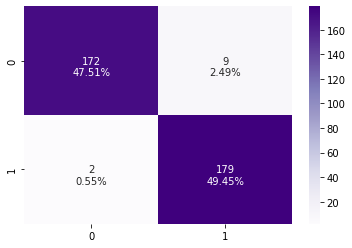

In [ ]:
Kfold_result(X,Y,stackclassifier,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
stackclassifier.fit(X,Y)
st_probs_y = stackclassifier.predict_proba(X)
st_auc_y = roc_auc_score(Y, st_probs_y[:,1])
st_fpr, st_tpr, threshold = roc_curve(Y,st_probs_y[:,1])
print(st_auc_y)

0.9971612588138336


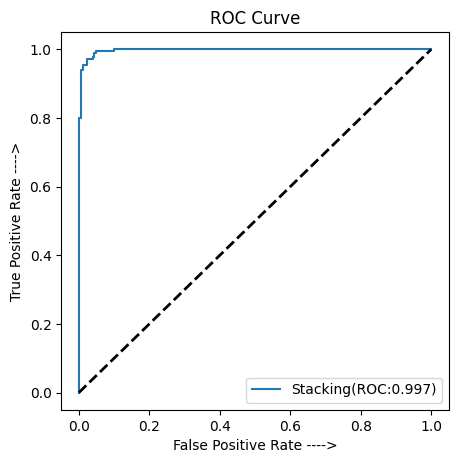

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve

plt.figure(figsize=(5,5),dpi = 100)
plt.plot(st_fpr,st_tpr,linestyle='-',label='Stacking(ROC:%0.3f)' % st_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

#Hard Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfh = VotingClassifier(estimators=[('LRmodel', classifier), ('SVM', sclassifier), ('RF', rfclassifier)],voting='hard')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble_hard']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfh], ['LR Classifier', 'SVM', 'RF', 'Ensemble']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))



Accuracy: 0.9672 (+/- 0.044) [LR Classifier]
Accuracy: 0.9672 (+/- 0.044) [SVM]
Accuracy: 0.9589 (+/- 0.044) [RF]
Accuracy: 0.9672 (+/- 0.044) [Ensemble_hard]
Precision: 0.9505 (+/- 0.058) [LR Classifier]
Precision: 0.9505 (+/- 0.058) [SVM]
Precision: 0.9505 (+/- 0.058) [RF]
Precision: 0.9505 (+/- 0.058) [Ensemble]
Recall: 0.9895 (+/- 0.032) [LR Classifier]
Recall: 0.9895 (+/- 0.032) [SVM]
Recall: 0.9728 (+/- 0.056) [RF]
Recall: 0.9895 (+/- 0.032) [Ensemble]


# Soft ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier
eclfs = VotingClassifier(estimators=[('LR', classifier), ('SVM', sclassifier), ('RF', rfclassifier)],voting='soft')

for clf, label in zip([classifier, sclassifier, rfclassifier, eclfs], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='accuracy', cv=10)
      print("Accuracy: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfs], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='precision', cv=10)
      print("Precision: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))
for clf, label in zip([classifier, sclassifier, rfclassifier, eclfs], ['LR', 'SVM', 'RF', 'Ensemble_soft']):
      scores = cross_val_score(clf, X, Y, scoring='recall', cv=10)
      print("Recall: %0.4f (+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))


Accuracy: 0.9672 (+/- 0.044) [LR]
Accuracy: 0.9672 (+/- 0.044) [SVM]
Accuracy: 0.9589 (+/- 0.044) [RF]
Accuracy: 0.9644 (+/- 0.042) [Ensemble_soft]
Precision: 0.9505 (+/- 0.058) [LR]
Precision: 0.9505 (+/- 0.058) [SVM]
Precision: 0.9505 (+/- 0.058) [RF]
Precision: 0.9505 (+/- 0.058) [Ensemble_soft]
Recall: 0.9895 (+/- 0.032) [LR]
Recall: 0.9895 (+/- 0.032) [SVM]
Recall: 0.9728 (+/- 0.056) [RF]
Recall: 0.9839 (+/- 0.034) [Ensemble_soft]



cross validation
cross accuracy: 0.9644144144144142
cross precision: 0.9504511278195489
cross recall: 0.9839181286549709
cross f1 score: 0.9661000734684946


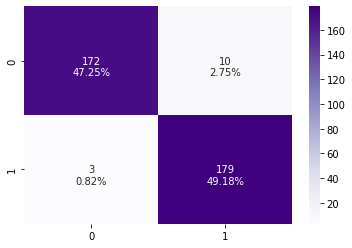

In [ ]:
Kfold_result(X,Y,eclfs,10)

In [ ]:
# AUC
from sklearn.metrics import roc_auc_score, roc_curve
eclfs.fit(X,Y)
es_probs_y = eclfs.predict_proba(X)
es_auc_y = roc_auc_score(Y, es_probs_y[:,1])
es_fpr, es_tpr, threshold = roc_curve(Y,es_probs_y[:,1])
print(es_auc_y)

0.9987320371935756


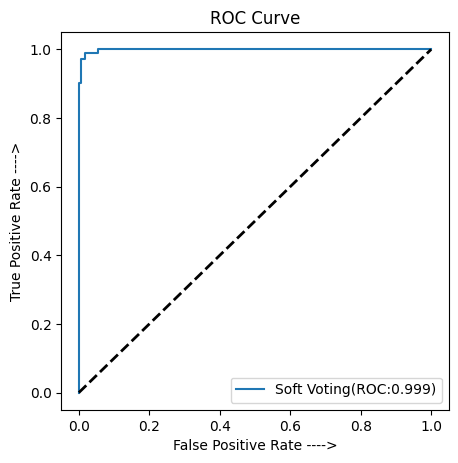

In [ ]:
from sklearn.metrics import roc_auc_score,roc_curve


plt.figure(figsize=(5,5),dpi = 100)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Soft Voting(ROC:%0.3f)' % es_auc_y)
lw=2
plt.plot([0, 1], [0, 1], color='black', lw=lw, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate ---->")
plt.ylabel("True Positive Rate ---->")
plt.legend()
plt.show()

# ROC

In [ ]:
lr_fpr,lr_tpr,_ = roc_curve(Y_test,lr_prob[:,1])
svm_fpr,svm_tpr,_ = roc_curve(Y_test,svm_prob[:,1])
nb_fpr,nb_tpr,_ = roc_curve(Y_test,nb_prob[:,1])
dt_fpr,dt_tpr,_ = roc_curve(Y_test,dt_prob[:,1])
rf_fpr,rf_tpr,_ = roc_curve(Y_test,rf_prob[:,1])
et_fpr,et_tpr,_ = roc_curve(Y_test,et_prob[:,1])


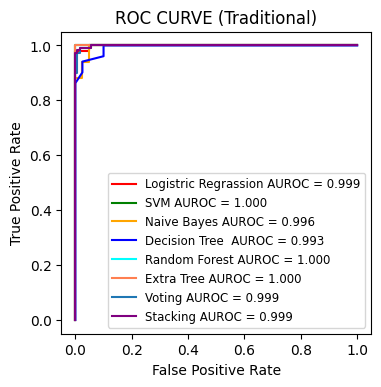

In [ ]:
plt.figure(figsize=(4,4),dpi = 100)
plt.plot(lr_fpr, lr_tpr, color = 'red', linestyle='-',label='Logistric Regrassion AUROC = %0.3f'% lr_auc)
plt.plot(svm_fpr, svm_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svm_auc)
plt.plot(nb_fpr, nb_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nb_auc)
plt.plot(dt_fpr, dt_tpr, color = 'blue', linestyle='-',label='Decision Tree  AUROC = %0.3f'% dt_auc)
plt.plot(rf_fpr, rf_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rf_auc)
plt.plot(et_fpr, et_tpr, color = 'coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% et_auc)
plt.plot(es_fpr,es_tpr,linestyle='-',label='Voting AUROC = %0.3f' % es_auc_y)
plt.plot(st_fpr,st_tpr,color = 'purple', linestyle='-',label='Stacking AUROC = %0.3f' % st_auc_y)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (Traditional)')
plt.legend(loc=4, prop={'size': 8.5})
plt.show()

# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

## Hyper parameter Tuning

### Bagging Logistic Regression Random Search

In [ ]:
grs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [LogisticRegression(solver='liblinear',multi_class='auto')],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
grs.fit(X,Y)
best_paramgrs = grs.best_params_
pd.DataFrame(grs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,True,39,1,0.966857
1,False,46,2,0.966857
2,False,62,1,0.966857
3,True,86,1,0.966857
4,True,84,1,0.966857
5,False,86,5,0.966857
6,False,78,2,0.966857
7,None,73,3,0.966857
8,True,32,5,0.966857
9,False,12,2,0.966857


### Bagging KNN Random Search

In [ ]:
kgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [KNeighborsClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
kgrs.fit(X_train,Y_train)
pd.DataFrame(kgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]


,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,None,28,1,0.955690
1,False,88,3,0.959394
2,None,46,4,0.959394
3,None,47,2,0.959394
4,True,96,5,0.959394
5,None,82,4,0.959394
6,None,97,5,0.955690
7,None,63,5,0.959394
8,None,43,4,0.959394
9,True,48,5,0.955690


### Bagging SVM Random Search

In [ ]:
sgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [SVC()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
sgrs.fit(X,Y)
best_paramsgrs = sgrs.best_params_
pd.DataFrame(grs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]
print(best_paramsgrs)

{'n_jobs': 4, 'n_estimators': 13, 'bootstrap_features': 'False', 'base_estimator': SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)}


### Bagging Naive Bayes Random Search

In [ ]:
nbgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [GaussianNB()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
nbgrs.fit(X,Y)
best_paramnbgrs = nbgrs.best_params_
pd.DataFrame(nbgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,True,35,5,0.969635
1,True,51,2,0.966895
2,None,13,3,0.966895
3,True,42,2,0.969635
4,None,72,2,0.966895
5,True,95,3,0.966895
6,None,34,2,0.966857
7,None,77,5,0.969635
8,True,72,4,0.972412
9,True,26,2,0.964117


### Bagging Decision Tree Random Search

In [ ]:
dtgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [DecisionTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
dtgrs.fit(X,Y)
best_paramdtgrs = dtgrs.best_params_
pd.DataFrame(dtgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,False,8,5,0.942047
1,None,17,2,0.939269
2,None,73,4,0.939269
3,False,94,3,0.939269
4,None,54,3,0.939269
5,False,40,2,0.939269
6,True,62,3,0.939269
7,False,20,1,0.939269
8,None,23,1,0.942047
9,True,67,2,0.939269


### Bagging Random Forest Random Search

In [ ]:
rfgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [RandomForestClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
rfgrs.fit(X,Y)
best_paramrfgrs = rfgrs.best_params_
pd.DataFrame(rfgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,None,66,1,0.966819
1,True,88,3,0.961339
2,True,74,4,0.964079
3,False,6,4,0.950190
4,False,16,2,0.961301
5,False,68,5,0.966819
6,False,62,5,0.966819
7,False,34,4,0.961301
8,False,51,5,0.969597
9,True,65,3,0.964041


### Bagging Extra Tree Random Search

In [ ]:
etgrs = RandomizedSearchCV(BaggingClassifier(),{
    'base_estimator' : [ExtraTreeClassifier()],
    'bootstrap_features': ['True','False',None],
    'n_estimators' : [i for i in range(1,100,1)],
    'n_jobs' : [1,2,3,4,5]
})
etgrs.fit(X,Y)
best_parametgrs = etgrs.best_params_
pd.DataFrame(etgrs.cv_results_)[['param_bootstrap_features','param_n_estimators','param_n_jobs','mean_test_score']]

,param_bootstrap_features,param_n_estimators,param_n_jobs,mean_test_score
0,None,67,5,0.964117
1,False,53,4,0.947603
2,True,5,4,0.955784
3,None,76,1,0.953082
4,False,31,5,0.947527
5,True,86,3,0.947527
6,False,48,5,0.955860
7,None,74,3,0.953082
8,None,77,4,0.955822
9,None,48,3,0.947565


## Base estimator Logistric Regression

In [ ]:
bag = BaggingClassifier(classifier,n_estimators= best_paramgrs['n_estimators'],bootstrap_features=best_paramgrs['bootstrap_features'],
                        n_jobs=best_paramgrs['n_jobs'],random_state=42)

In [ ]:
bag.fit(X,Y)

BaggingClassifier(base_estimator=LogisticRegression(C=1, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=42,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features='True', max_features=1.0,
                  max_samples=1.0, n_estimators=39, n_jobs=1, oob_score=False,
                  random_state=42, verbose

In [ ]:
Y_predbglr = bag.predict(X_test)

In [ ]:
Y_cvpredbglr = cross_val_predict(bag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbglr)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbglr)
print(cmbg)

[[171  10]
 [  2 179]]


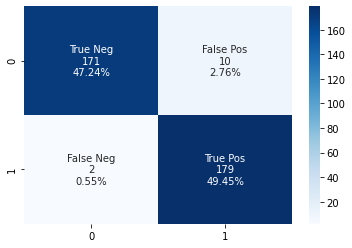

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(bag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbglr)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbglr)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
lrbg_prob = bag.predict_proba(X_test)
lrbg_auc = roc_auc_score(Y_test,lrbg_prob[:,1])
print('roc-auc score :{}'.format(lrbg_auc))

roc-auc score :1.0


## Base estimator K-NN

In [ ]:
kbag = BaggingClassifier(kclassifier, n_estimators= 75,bootstrap_features=False,n_jobs=3)

In [ ]:
kbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=1,
                                                      metric='euclidean',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=5, p=1,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=75, n_jobs=3, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgk = kbag.predict(X_test)

In [ ]:
Y_cvpredbgk = cross_val_predict(kbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgk)
print(cm)

[[36  1]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgk)
print(cmbg)

[[171  10]
 [  3 178]]


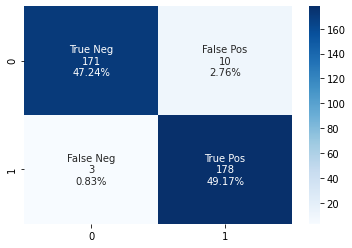

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(kbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 0.97222222
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9641891891891892


In [ ]:
cvresult(Y,Y_cvpredbgk)

Cross Val f1 score :  0.964769647696477
Cross Val Precision :  0.9468085106382979
Cross Val recall :  0.9834254143646409
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       181
           1       0.95      0.98      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbgk)

Accuracy :  0.978021978021978
f1 score :  0.9814814814814815
Precision :  0.9814814814814815
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.98      0.98      0.98        54

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
knnbg_prob = kbag.predict_proba(X_test)
knnbg_auc = roc_auc_score(Y_test,knnbg_prob[:,1])
print('roc-auc score :{}'.format(knnbg_auc))

roc-auc score :0.9994994994994995


## Base estimator SVM

In [ ]:
sbag = BaggingClassifier(sclassifier, n_estimators= best_paramsgrs['n_estimators'],bootstrap_features=best_paramsgrs['bootstrap_features'],
                          n_jobs= best_paramsgrs['n_jobs'],random_state=42)

In [ ]:
sbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='rbf', max_iter=-1,
                                     probability=True, random_state=42,
                                     shrinking=True, tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features='False', max_features=1.0,
                  max_samples=1.0, n_estimators=13, n_jobs=4, oob_score=False,
                  random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_predbgs = sbag.predict(X_test)

In [ ]:
Y_cvpredbgs = cross_val_predict(sbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgs)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgs)
print(cmbg)

[[171  10]
 [  2 179]]


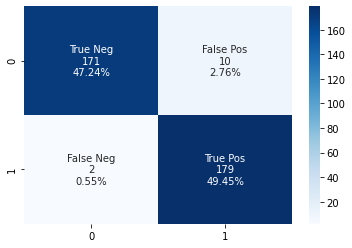

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgs)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbgs)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
svmbg_prob = sbag.predict_proba(X_test)
svmbg_auc = roc_auc_score(Y_test,svmbg_prob[:,1])
print('roc-auc score :{}'.format(svmbg_auc))

roc-auc score :1.0


## Base estimator kernal SVM

In [ ]:
ksbag = BaggingClassifier(ksclassifier, n_estimators= 75,bootstrap_features=True,n_jobs=3)

In [ ]:
ksbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                     class_weight=None, coef0=0.0,
                                     decision_function_shape='ovr', degree=3,
                                     gamma='scale', kernel='linear',
                                     max_iter=-1, probability=True,
                                     random_state=0, shrinking=True, tol=0.001,
                                     verbose=False),
                  bootstrap=True, bootstrap_features=True, max_features=1.0,
                  max_samples=1.0, n_estimators=75, n_jobs=3, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [ ]:
Y_predbgks = ksbag.predict(X_test)

In [ ]:
Y_cvpredbgks = cross_val_predict(ksbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgks)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgks)
print(cmbg)

[[171  10]
 [  2 179]]


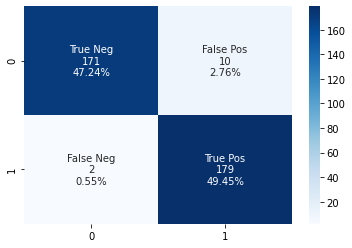

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgks)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predks)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
ksvmbg_prob = ksbag.predict_proba(X_test)
ksvmbg_auc = roc_auc_score(Y_test,ksvmbg_prob[:,1])
print('roc-auc score :{}'.format(ksvmbg_auc))

roc-auc score :1.0


## Base estimator Naive Bayes

In [ ]:
nbbag = BaggingClassifier(nbclassifier, n_estimators= best_paramnbgrs['n_estimators'],
                          bootstrap_features=best_paramnbgrs['bootstrap_features'],
                          n_jobs=best_paramnbgrs['n_jobs'],random_state=42)

In [ ]:
nbbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=0.01),
                  bootstrap=True, bootstrap_features='True', max_features=1.0,
                  max_samples=1.0, n_estimators=72, n_jobs=4, oob_score=False,
                  random_state=42, verbose=0, warm_start=False)

In [ ]:
Y_predbgnb = nbbag.predict(X_test)

In [ ]:
Y_cvpredbgnb = cross_val_predict(nbbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgnb)
print(cm)

[[37  0]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgnb)
print(cmbg)

[[173   8]
 [  4 177]]


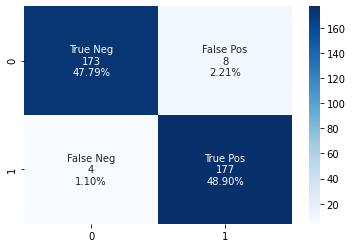

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.94444444 0.97222222 0.94444444 0.97222222]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgnb)

Cross Val f1 score :  0.9672131147540983
Cross Val Precision :  0.9567567567567568
Cross Val recall :  0.9779005524861878
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       181
           1       0.96      0.98      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbgnb)

Accuracy :  0.989010989010989
f1 score :  0.9906542056074767
Precision :  1.0
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
nbbg_prob = nbbag.predict_proba(X_test)
nbbg_auc = roc_auc_score(Y_test,nbbg_prob[:,1])
print('roc-auc score :{}'.format(nbbg_auc))

roc-auc score :1.0


## Base estimator Decision Tree

In [ ]:
dtbag = BaggingClassifier(dtclassifier, n_estimators= best_paramdtgrs['n_estimators'],bootstrap_features=best_paramdtgrs['bootstrap_features'],
                          n_jobs=best_paramdtgrs['n_jobs'],random_state =42)

In [ ]:
dtbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=1,
                                                        max_features=None,
                                                        max_leaf_nodes=70,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=4,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
       

In [ ]:
Y_predbgdt = dtbag.predict(X_test)

In [ ]:
Y_cvpredbgdt = cross_val_predict(dtbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgdt)
print(cm)

[[37  0]
 [ 2 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgdt)
print(cmbg)

[[171  10]
 [  2 179]]


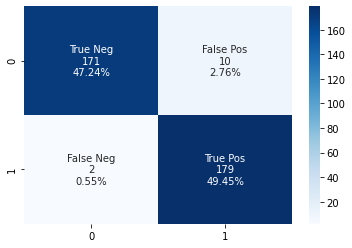

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9669669669669669


In [ ]:
cvresult(Y,Y_cvpredbgdt)

Cross Val f1 score :  0.9675675675675676
Cross Val Precision :  0.9470899470899471
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.94      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbgdt)

Accuracy :  0.978021978021978
f1 score :  0.9811320754716981
Precision :  1.0
recall :  0.9629629629629629
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.96      0.98        54

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
dtbg_prob = dtbag.predict_proba(X_test)
dtbg_auc = roc_auc_score(Y_test,dtbg_prob[:,1])
print('roc-auc score :{}'.format(dtbg_auc))

roc-auc score :1.0


## Base estimator Random Forest

In [ ]:
rfbag = BaggingClassifier(rfclassifier, n_estimators= best_paramrfgrs['n_estimators'],bootstrap_features=best_paramrfgrs['bootstrap_features'],
                          n_jobs=best_paramrfgrs['n_jobs'],random_state=42)

In [ ]:
rfbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features='log2',
                                                        max_leaf_nodes=None,
                                                        max_samples=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
        

In [ ]:
Y_predbgrf = rfbag.predict(X_test)

In [ ]:
Y_cvpredbgrf = cross_val_predict(rfbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbgrf)
print(cm)

[[37  0]
 [ 1 53]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbgrf)
print(cmbg)

[[172   9]
 [  4 177]]


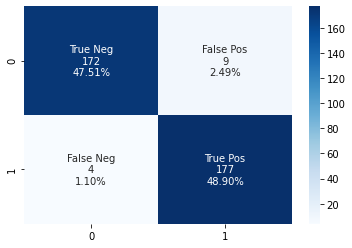

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 0.97222222
 0.88888889 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9641891891891892


In [ ]:
cvresult(Y,Y_cvpredbgrf)

Cross Val f1 score :  0.9645776566757494
Cross Val Precision :  0.9516129032258065
Cross Val recall :  0.9779005524861878
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       181
           1       0.95      0.98      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbgrf)

Accuracy :  0.989010989010989
f1 score :  0.9906542056074767
Precision :  1.0
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
rfbg_prob = rfbag.predict_proba(X_test)
rfbg_auc = roc_auc_score(Y_test,rfbg_prob[:,1])
print('roc-auc score :{}'.format(rfbg_auc))

roc-auc score :0.9994994994994995


## Base estimator Extra Tree

In [ ]:
etbag = BaggingClassifier(etclassifier, n_estimators= best_parametgrs['n_estimators'],
                          bootstrap_features=best_parametgrs['bootstrap_features'],n_jobs=best_parametgrs['n_jobs'],random_state=42)

In [ ]:
etbag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=ExtraTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=19,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     random_state=42,
                                                     splitter='random'),
                  bootstrap=True, bootstrap

In [ ]:
Y_predbget = etbag.predict(X_test)

In [ ]:
Y_cvpredbget = cross_val_predict(etbag,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbget)
print(cm)

[[37  0]
 [ 2 52]]


In [ ]:
cmbg = confusion_matrix(Y,Y_cvpredbget)
print(cmbg)

[[173   8]
 [  8 173]]


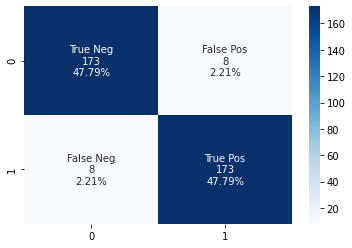

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbg.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbg.flatten()/np.sum(cmbg)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbg, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etbag,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 1.         1.         0.97222222 0.91666667 0.94444444
 0.88888889 1.         0.97222222 1.        ]

Cross Val Accuracy : 0.955930930930931


In [ ]:
cvresult(Y,Y_cvpredbget)

Cross Val f1 score :  0.9558011049723757
Cross Val Precision :  0.9558011049723757
Cross Val recall :  0.9558011049723757
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       181
           1       0.96      0.96      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbget)

Accuracy :  0.978021978021978
f1 score :  0.9811320754716981
Precision :  1.0
recall :  0.9629629629629629
Classification Report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       1.00      0.96      0.98        54

    accuracy                           0.98        91
   macro avg       0.97      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [ ]:
etbg_prob = etbag.predict_proba(X_test)
etbg_auc = roc_auc_score(Y_test,etbg_prob[:,1])
print('roc-auc score :{}'.format(etbg_auc))

roc-auc score :0.9997497497497497


## ROC AUC CURVE  (Bagging)

In [ ]:
lrg_fpr,lrg_tpr,_ = roc_curve(Y_test,lrbg_prob[:,1])
svmg_fpr,svmg_tpr,_ = roc_curve(Y_test,svmbg_prob[:,1])
nbg_fpr,nbg_tpr,_ = roc_curve(Y_test,nbbg_prob[:,1])
dtg_fpr,dtg_tpr,_ = roc_curve(Y_test,dtbg_prob[:,1])
rfg_fpr,rfg_tpr,_ = roc_curve(Y_test,rfbg_prob[:,1])
etg_fpr,etg_tpr,_ = roc_curve(Y_test,etbg_prob[:,1])

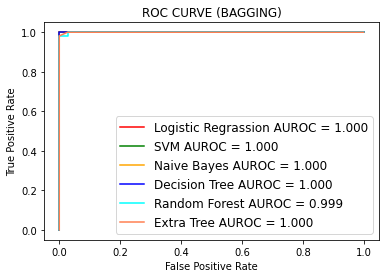

In [ ]:
plt.plot(lrg_fpr, lrg_tpr, color = 'red', linestyle='-',label='Logistic Regrassion AUROC = %0.3f'% lrbg_auc)
plt.plot(svmg_fpr, svmg_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svmbg_auc)
plt.plot(nbg_fpr, nbg_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nbbg_auc)
plt.plot(dtg_fpr, dtg_tpr, color = 'blue', linestyle='-',label='Decision Tree AUROC = %0.3f'% dtbg_auc)
plt.plot(rfg_fpr, rfg_tpr, color = 'cyan', linestyle='-',label='Random Forest AUROC = %0.3f'% rfbg_auc)
plt.plot(etg_fpr, etg_tpr, color = 'Coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% etbg_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (BAGGING)')
plt.legend(loc=4, prop={'size': 12})
plt.show()

# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
from sklearn.utils.testing import all_estimators

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## Base estimator Logistric Regression

In [ ]:
bs = AdaBoostClassifier(classifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
bs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=LogisticRegression(C=1, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='auto',
                                                     n_jobs=None, penalty='l2',
                                                     random_state=42,
                                                     solver='lbfgs', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
                   learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
Y_predbslr = bs.predict(X_test)

In [ ]:
Y_cvpredbslr = cross_val_predict(bs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbslr)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbslr)
print(cmbs)

[[172   9]
 [  2 179]]


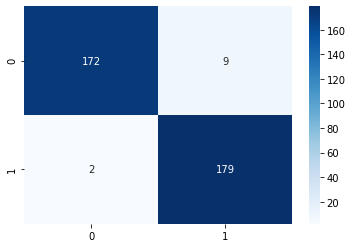

In [ ]:
labels = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(bs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.91666667 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9697447447447448


In [ ]:
cvresult(Y,Y_cvpredbslr)

Cross Val f1 score :  0.970189701897019
Cross Val Precision :  0.9521276595744681
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbslr)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
lrbs_prob = bs.predict_proba(X_test)
lrbs_auc = roc_auc_score(Y_test,lrbs_prob[:,1])
print('roc-auc score :{}'.format(lrbs_auc))

roc-auc score :1.0


## Base estimator K-NN

In [ ]:
kbs = AdaBoostClassifier(kclassifier,learning_rate=1, n_estimators=10, random_state=None)

In [ ]:
kbs.fit(X_train,Y_train)

ValueError: ignored

## Base estimator SVM

In [ ]:
sbs = AdaBoostClassifier(sclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
sbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='rbf', max_iter=-1,
                                      probability=True, random_state=42,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
Y_predbss = sbs.predict(X_test)

In [ ]:
Y_cvpredbss = cross_val_predict(sbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbss)
print(cm)

[[36  1]
 [ 0 54]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbss)
print(cmbs)

[[158  23]
 [  2 179]]


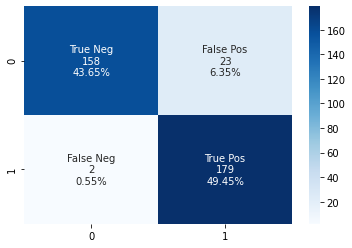

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(sbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 0.59459459 0.97222222 1.         0.97222222 1.
 0.94444444 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.931981981981982


In [ ]:
cvresult(Y,Y_cvpredbss)

Cross Val f1 score :  0.9347258485639687
Cross Val Precision :  0.8861386138613861
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.87      0.93       181
           1       0.89      0.99      0.93       181

    accuracy                           0.93       362
   macro avg       0.94      0.93      0.93       362
weighted avg       0.94      0.93      0.93       362



In [ ]:
result(Y_test,Y_predbss)

Accuracy :  0.989010989010989
f1 score :  0.9908256880733944
Precision :  0.9818181818181818
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.98      1.00      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
svmbs_prob = sbs.predict_proba(X_test)
svmbs_auc = roc_auc_score(Y_test,svmbs_prob[:,1])
print('roc-auc score :{}'.format(svmbs_auc))

roc-auc score :1.0


## Base estimator Kernal SVM

In [ ]:
ksbs = AdaBoostClassifier(ksclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
ksbs.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='linear',
                                      max_iter=-1, probability=True,
                                      random_state=0, shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
Y_predbsks = ksbs.predict(X_test)

In [ ]:
Y_cvpredbsks = cross_val_predict(ksbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsks)
print(cm)

[[37  0]
 [ 1 53]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsks)
print(cmbs)

[[172   9]
 [  2 179]]


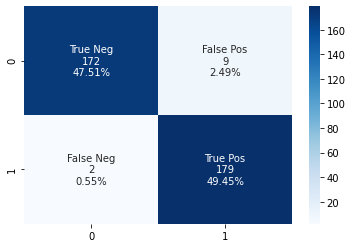

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(ksbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.91666667 1.         0.94444444 1.        ]

Cross Val Accuracy : 0.9697447447447448


In [ ]:
cvresult(Y,Y_cvpredbsks)

Cross Val f1 score :  0.970189701897019
Cross Val Precision :  0.9521276595744681
Cross Val recall :  0.988950276243094
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.95      0.97       181
           1       0.95      0.99      0.97       181

    accuracy                           0.97       362
   macro avg       0.97      0.97      0.97       362
weighted avg       0.97      0.97      0.97       362



In [ ]:
result(Y_test,Y_predbsks)

Accuracy :  0.989010989010989
f1 score :  0.9906542056074767
Precision :  1.0
recall :  0.9814814814814815
Classification Report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      0.98      0.99        54

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



In [ ]:
ksvmbs_prob = ksbs.predict_proba(X_test)
ksvmbs_auc = roc_auc_score(Y_test,ksvmbs_prob[:,1])
print('roc-auc score :{}'.format(ksvmbs_auc))

roc-auc score :1.0


## Base estimator Naive Bays

In [ ]:
nbbs = AdaBoostClassifier(nbclassifier,learning_rate=1, n_estimators=10, random_state=0)

In [ ]:
nbbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=GaussianNB(priors=None, var_smoothing=0.01),
                   learning_rate=1, n_estimators=10, random_state=0)

In [ ]:
Y_predbsnb = nbbs.predict(X_test)

In [ ]:
Y_cvpredbsnb = cross_val_predict(nbbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsnb)
print(cm)

[[36  1]
 [13 41]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsnb)
print(cmbs)

[[169  12]
 [ 30 151]]


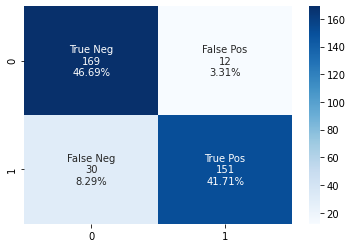

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(nbbs,X_train,Y_train, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.85714286 0.85185185 0.92592593 0.74074074 0.88888889 0.7037037
 0.96296296 0.96296296 0.92592593 1.        ]

Cross Val Accuracy : 0.8820105820105819


In [ ]:
cvresult(Y,Y_cvpredbsnb)

Cross Val f1 score :  0.877906976744186
Cross Val Precision :  0.9263803680981595
Cross Val recall :  0.8342541436464088
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89       181
           1       0.93      0.83      0.88       181

    accuracy                           0.88       362
   macro avg       0.89      0.88      0.88       362
weighted avg       0.89      0.88      0.88       362



In [ ]:
result(Y_test,Y_predbsnb)

Accuracy :  0.8461538461538461
f1 score :  0.8541666666666667
Precision :  0.9761904761904762
recall :  0.7592592592592593
Classification Report : 
               precision    recall  f1-score   support

           0       0.73      0.97      0.84        37
           1       0.98      0.76      0.85        54

    accuracy                           0.85        91
   macro avg       0.86      0.87      0.85        91
weighted avg       0.88      0.85      0.85        91



In [ ]:
nbbs_prob = nbbs.predict_proba(X_test)
nbbs_auc = roc_auc_score(Y_test,nbbs_prob[:,1])
print('roc-auc score :{}'.format(nbbs_auc))

roc-auc score :0.973973973973974


## Base estimator Decision Tree

In [ ]:
dtbs = AdaBoostClassifier(dtclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
dtbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=70,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=4,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [ ]:
Y_predbsdt = dtbs.predict(X_test)

In [ ]:
Y_cvpredbsdt = cross_val_predict(dtbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsdt)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsdt)
print(cmbs)

[[170  11]
 [  3 178]]


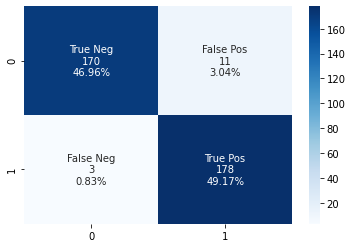

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(dtbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.89189189 1.         0.97222222 1.         0.97222222 1.
 0.86111111 1.         0.91666667 1.        ]

Cross Val Accuracy : 0.9614114114114114


In [ ]:
cvresult(Y,Y_cvpredbsdt)

Cross Val f1 score :  0.9621621621621621
Cross Val Precision :  0.9417989417989417
Cross Val recall :  0.9834254143646409
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96       181
           1       0.94      0.98      0.96       181

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



In [ ]:
result(Y_test,Y_predbsdt)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
dtbs_prob = dtbs.predict_proba(X_test)
dtbs_auc = roc_auc_score(Y_test,dtbs_prob[:,1])
print('roc-auc score :{}'.format(dtbs_auc))

roc-auc score :1.0


## Base estimator Random Rofest

In [ ]:
rfbs = AdaBoostClassifier(rfclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
rfbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='log2',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                          

In [ ]:
Y_predbsrf = rfbs.predict(X_test)

In [ ]:
Y_cvpredbsrf = cross_val_predict(rfbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbsrf)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbsrf)
print(cmbs)

[[173   8]
 [ 11 170]]


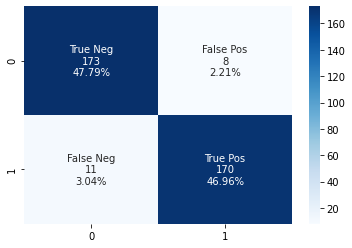

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(rfbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 1.         1.         0.94444444 0.91666667 0.91666667
 0.86111111 1.         0.97222222 1.        ]

Cross Val Accuracy : 0.9475975975975975


In [ ]:
cvresult(Y,Y_cvpredbsrf)

Cross Val f1 score :  0.9470752089136492
Cross Val Precision :  0.9550561797752809
Cross Val recall :  0.9392265193370166
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       181
           1       0.96      0.94      0.95       181

    accuracy                           0.95       362
   macro avg       0.95      0.95      0.95       362
weighted avg       0.95      0.95      0.95       362



In [ ]:
result(Y_test,Y_predbsrf)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
rfbs_prob = rfbs.predict_proba(X_test)
rfbs_auc = roc_auc_score(Y_test,rfbs_prob[:,1])
print('roc-auc score :{}'.format(rfbs_auc))

roc-auc score :1.0


## Base estimator Extra Tree

In [ ]:
etbs = AdaBoostClassifier(etclassifier,learning_rate=1, n_estimators=10, random_state=42)

In [ ]:
etbs.fit(X,Y)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=ExtraTreeClassifier(ccp_alpha=0.0,
                                                      class_weight=None,
                                                      criterion='gini',
                                                      max_depth=19,
                                                      max_features='auto',
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      random_state=42,
                                                      splitter='

In [ ]:
Y_predbset = etbs.predict(X_test)

In [ ]:
Y_cvpredbset = cross_val_predict(etbs,X,Y,cv = 10)

In [ ]:
cm = confusion_matrix(Y_test,Y_predbset)
print(cm)

[[37  0]
 [ 0 54]]


In [ ]:
cmbs = confusion_matrix(Y,Y_cvpredbset)
print(cmbs)

[[173   8]
 [ 12 169]]


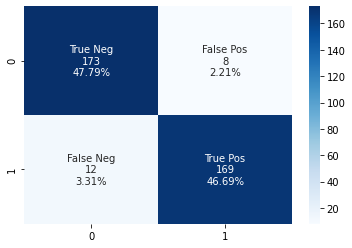

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cmbs.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cmbs.flatten()/np.sum(cmbs)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cmbs, annot=labels, fmt='', cmap='Blues')

In [ ]:
accuracy = cross_val_score(etbs,X,Y, cv=10, scoring='accuracy')
print('All Cross Val Accuracy :',accuracy)
print('\nCross Val Accuracy :',accuracy.mean())

All Cross Val Accuracy : [0.86486486 1.         0.97222222 0.97222222 0.94444444 0.86111111
 0.86111111 1.         0.97222222 1.        ]

Cross Val Accuracy : 0.9448198198198199


In [ ]:
cvresult(Y,Y_cvpredbset)

Cross Val f1 score :  0.9441340782122905
Cross Val Precision :  0.9548022598870056
Cross Val recall :  0.9337016574585635
Cross Val Classification Report : 
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       181
           1       0.95      0.93      0.94       181

    accuracy                           0.94       362
   macro avg       0.94      0.94      0.94       362
weighted avg       0.94      0.94      0.94       362



In [ ]:
result(Y_test,Y_predbset)

Accuracy :  1.0
f1 score :  1.0
Precision :  1.0
recall :  1.0
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        54

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



In [ ]:
etbs_prob = etbs.predict_proba(X_test)
etbs_auc = roc_auc_score(Y_test,etbs_prob[:,1])
print('roc-auc score :{}'.format(etbs_auc))

roc-auc score :1.0


## ROC AUC CURVE  (Boosting)

In [ ]:
lrs_fpr,lrs_tpr,_ = roc_curve(Y_test,lrbs_prob[:,1])
svms_fpr,svms_tpr,_ = roc_curve(Y_test,svmbs_prob[:,1])
nbs_fpr,nbs_tpr,_ = roc_curve(Y_test,nbbs_prob[:,1])
dts_fpr,dts_tpr,_ = roc_curve(Y_test,dtbs_prob[:,1])
rfs_fpr,rfs_tpr,_ = roc_curve(Y_test,rfbs_prob[:,1])
ets_fpr,ets_tpr,_ = roc_curve(Y_test,etbs_prob[:,1])

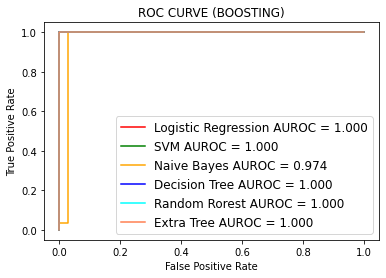

In [ ]:
plt.plot(lrs_fpr, lrs_tpr, color = 'red', linestyle='-',label='Logistic Regression AUROC = %0.3f'% lrbs_auc)
plt.plot(svms_fpr, svms_tpr, color = 'green', linestyle='-',label='SVM AUROC = %0.3f'% svmbs_auc)
plt.plot(nbs_fpr, nbs_tpr, color = 'orange', linestyle='-',label='Naive Bayes AUROC = %0.3f'% nbbs_auc)
plt.plot(dts_fpr, dts_tpr, color = 'blue', linestyle='-',label='Decision Tree AUROC = %0.3f'% dtbs_auc)
plt.plot(rfs_fpr, rfs_tpr, color = 'cyan', linestyle='-',label='Random Rorest AUROC = %0.3f'% rfbs_auc)
plt.plot(ets_fpr, ets_tpr, color = 'Coral', linestyle='-',label='Extra Tree AUROC = %0.3f'% etbs_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE (BOOSTING)')
plt.legend(loc=4, prop={'size': 12})
plt.show()